<a href="https://colab.research.google.com/github/IKRAM1919/basededonnees/blob/main/sas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyse des Données de Santé Publique

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("/content/DataSet.csv")

In [ ]:
print(data.shape)

(5735, 28)


In [ ]:
print(data.columns)

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')


In [ ]:
print(list(data.columns))

['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR', 'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'HIQ210']


In [ ]:
colonnes=['SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI']
sous_data=data[colonnes]
print(sous_data)


       SEQN  SMQ020  RIAGENDR  RIDAGEYR  DMDEDUC2  BMXWT  BMXHT  BMXBMI
0     83732       1         1        62       5.0   94.8  184.5    27.8
1     83733       1         1        53       3.0   90.4  171.4    30.8
2     83734       1         1        78       3.0   83.4  170.1    28.8
3     83735       2         2        56       5.0  109.8  160.9    42.4
4     83736       2         2        42       4.0   55.2  164.9    20.3
...     ...     ...       ...       ...       ...    ...    ...     ...
5730  93695       1         2        76       3.0   59.1  165.8    21.5
5731  93696       2         1        26       5.0  112.1  182.2    33.8
5732  93697       1         2        80       4.0   71.7  152.2    31.0
5733  93700       1         1        35       1.0   78.2  173.3    26.0
5734  93702       2         2        24       5.0   58.3  165.0    21.4

[5735 rows x 8 columns]


In [ ]:
print(sous_data.shape)

(5735, 8)


In [ ]:
print(sous_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   SMQ020    5735 non-null   int64  
 2   RIAGENDR  5735 non-null   int64  
 3   RIDAGEYR  5735 non-null   int64  
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXHT     5673 non-null   float64
 7   BMXBMI    5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB
None


In [ ]:
sous_data=sous_data.rename(columns={'SEQN':'seqn','SMQ020':'smoking','RIAGENDR':'gender', 'RIDAGEYR':'age','DMDEDUC2':'education','BMXWT':'weight','BMXHT':'height','BMXBMI':'bmi'})
print(sous_data.columns.to_list())

['seqn', 'smoking', 'gender', 'age', 'education', 'weight', 'height', 'bmi']


In [ ]:
doublons_sous_data=sous_data.duplicated()
print(doublons_sous_data.any())

False


In [ ]:
doublons_data=data.duplicated()
print(doublons_data.any())
print(doublons_data.sum())

False
0


In [ ]:
colonnes=['SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI']
sous_data=data[colonnes]
sous_data=sous_data.rename(columns={'SEQN':'seqn','SMQ020':'smoking','RIAGENDR':'gender', 'RIDAGEYR':'age','DMDEDUC2':'education','BMXWT':'weight','BMXHT':'height','BMXBMI':'bmi'})
sous_data=sous_data.drop(columns=['seqn'])
print(sous_data.info())
print(sous_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   smoking    5735 non-null   int64  
 1   gender     5735 non-null   int64  
 2   age        5735 non-null   int64  
 3   education  5474 non-null   float64
 4   weight     5666 non-null   float64
 5   height     5673 non-null   float64
 6   bmi        5662 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 313.8 KB
None
Index(['smoking', 'gender', 'age', 'education', 'weight', 'height', 'bmi'], dtype='object')


In [ ]:
print(sous_data.isna().sum()[sous_data.isna().sum()>0])

education    261
weight        69
height        62
bmi           73
dtype: int64


In [ ]:
sous_data['education'] = sous_data['education'].fillna(sous_data['education'].median())
sous_data['weight']=sous_data['weight'].fillna(sous_data['weight'].mean())
sous_data['height']=sous_data['height'].fillna(sous_data['height'].mean())
sous_data['bmi']=sous_data['bmi'].fillna(sous_data['bmi'].mean())
print(sous_data.columns=='education')
print(sous_data.columns=='height')
print(sous_data.columns=='weight')
print(sous_data.columns=='bmi')


[False False False  True False False False]
[False False False False False  True False]
[False False False False  True False False]
[False False False False False False  True]


In [ ]:
print(sous_data.isna().sum()[sous_data.isna().sum()>0])

Series([], dtype: int64)


In [ ]:
print(sous_data.describe())

           smoking       gender          age    education       weight  \
count  5735.000000  5735.000000  5735.000000  5735.000000  5735.000000   
mean      1.607149     1.518919    48.052310     3.467132    81.342676   
std       0.571975     0.499686    18.431011     1.284826    21.633062   
min       1.000000     1.000000    18.000000     1.000000    32.400000   
25%       1.000000     1.000000    32.000000     3.000000    66.100000   
50%       2.000000     2.000000    48.000000     4.000000    78.400000   
75%       2.000000     2.000000    63.000000     4.000000    92.600000   
max       9.000000     2.000000    80.000000     9.000000   198.900000   

            height          bmi  
count  5735.000000  5735.000000  
mean    166.142834    29.382197  
std      10.024624     7.050607  
min     129.700000    14.500000  
25%     158.750000    24.400000  
50%     166.142834    28.400000  
75%     173.400000    33.000000  
max     202.700000    67.300000  


Détecter les valeurs aberrantes (outliers) à l’aide de méthodes statistiques.texte en gras

In [ ]:
def outliers(sous_data):
    # Liste des index à supprimer
    index_outliers = []
    #colonnes_numeriques = sous_data.select_dtypes(include='number').columns

    for col in sous_data.columns:
        Q1 = sous_data[col].quantile(0.25)
        Q3 = sous_data[col].quantile(0.75)
        IQR = Q3 - Q1
        borne_inf = Q1 - 1.5 * IQR
        borne_sup = Q3 + 1.5 * IQR

        outliers = sous_data[(sous_data[col] < borne_inf) | (sous_data[col] > borne_sup)]
        index_outliers.extend(outliers.index.to_list()) # Get the index of the outliers
        print(f"Colonne : {col}")
        print(f"IQR = {IQR}")
        print("Valeurs aberrantes :")
        print(outliers[[col]])
        print("-" * 40)

    return list(set(index_outliers))


print(outliers(sous_data))

Colonne : smoking
IQR = 1.0
Valeurs aberrantes :
      smoking
288         7
1331        9
1433        9
1636        7
1756        9
2818        9
4835        9
4964        9
5270        9
5324        9
----------------------------------------
Colonne : gender
IQR = 1.0
Valeurs aberrantes :
Empty DataFrame
Columns: [gender]
Index: []
----------------------------------------
Colonne : age
IQR = 31.0
Valeurs aberrantes :
Empty DataFrame
Columns: [age]
Index: []
----------------------------------------
Colonne : education
IQR = 1.0
Valeurs aberrantes :
      education
15          1.0
22          1.0
29          1.0
32          1.0
43          1.0
...         ...
5713        1.0
5716        1.0
5719        1.0
5727        1.0
5733        1.0

[658 rows x 1 columns]
----------------------------------------
Colonne : weight
IQR = 26.5
Valeurs aberrantes :
      weight
58     133.3
66     146.1
131    147.0
152    143.6
158    137.7
...      ...
5552   132.6
5589   136.9
5590   178.3
5630   1

In [ ]:
print(sous_data.shape)

(5735, 7)


Supprimer les outliers pour améliorer la qualité des données


In [ ]:
index_outliers = outliers(sous_data)
sous_data_clean = sous_data.drop(index_outliers)

print("DataFrame sans outliers :")
print(sous_data_clean)


Colonne : smoking
IQR = 1.0
Valeurs aberrantes :
      smoking
288         7
1331        9
1433        9
1636        7
1756        9
2818        9
4835        9
4964        9
5270        9
5324        9
----------------------------------------
Colonne : gender
IQR = 1.0
Valeurs aberrantes :
Empty DataFrame
Columns: [gender]
Index: []
----------------------------------------
Colonne : age
IQR = 31.0
Valeurs aberrantes :
Empty DataFrame
Columns: [age]
Index: []
----------------------------------------
Colonne : education
IQR = 1.0
Valeurs aberrantes :
      education
15          1.0
22          1.0
29          1.0
32          1.0
43          1.0
...         ...
5713        1.0
5716        1.0
5719        1.0
5727        1.0
5733        1.0

[658 rows x 1 columns]
----------------------------------------
Colonne : weight
IQR = 26.5
Valeurs aberrantes :
      weight
58     133.3
66     146.1
131    147.0
152    143.6
158    137.7
...      ...
5552   132.6
5589   136.9
5590   178.3
5630   1

In [ ]:
print("Nombre de lignes avant :", sous_data.shape[0])
print("Nombre de lignes après :", sous_data_clean.shape[0])


Nombre de lignes avant : 5735
Nombre de lignes après : 4852


In [ ]:
smoking = {1: 'yes', 2: 'no', 7: np.nan, 8: np.nan}
gender = {1: 'male', 2: 'female'}
education = {1: '<9th grade',2: '9-11th grade',3: 'HS or GED',4: 'Some college / AA',5: 'College or above',7: 'Other',8: 'Other'}
sous_data_clean['smoking'] = sous_data_clean['smoking'].replace(smoking)
sous_data_clean['gender'] = sous_data_clean['gender'].replace(gender)
sous_data_clean['education'] = sous_data_clean['education'].replace(education)
print(sous_data_clean)

     smoking  gender  age          education  weight  height   bmi
0        yes    male   62   College or above    94.8   184.5  27.8
1        yes    male   53          HS or GED    90.4   171.4  30.8
2        yes    male   78          HS or GED    83.4   170.1  28.8
3         no  female   56   College or above   109.8   160.9  42.4
4         no  female   42  Some college / AA    55.2   164.9  20.3
...      ...     ...  ...                ...     ...     ...   ...
5728      no    male   32       9-11th grade    89.5   164.9  32.9
5730     yes  female   76          HS or GED    59.1   165.8  21.5
5731      no    male   26   College or above   112.1   182.2  33.8
5732     yes  female   80  Some college / AA    71.7   152.2  31.0
5734      no  female   24   College or above    58.3   165.0  21.4

[4852 rows x 7 columns]


**Analyse** les relations entre variables


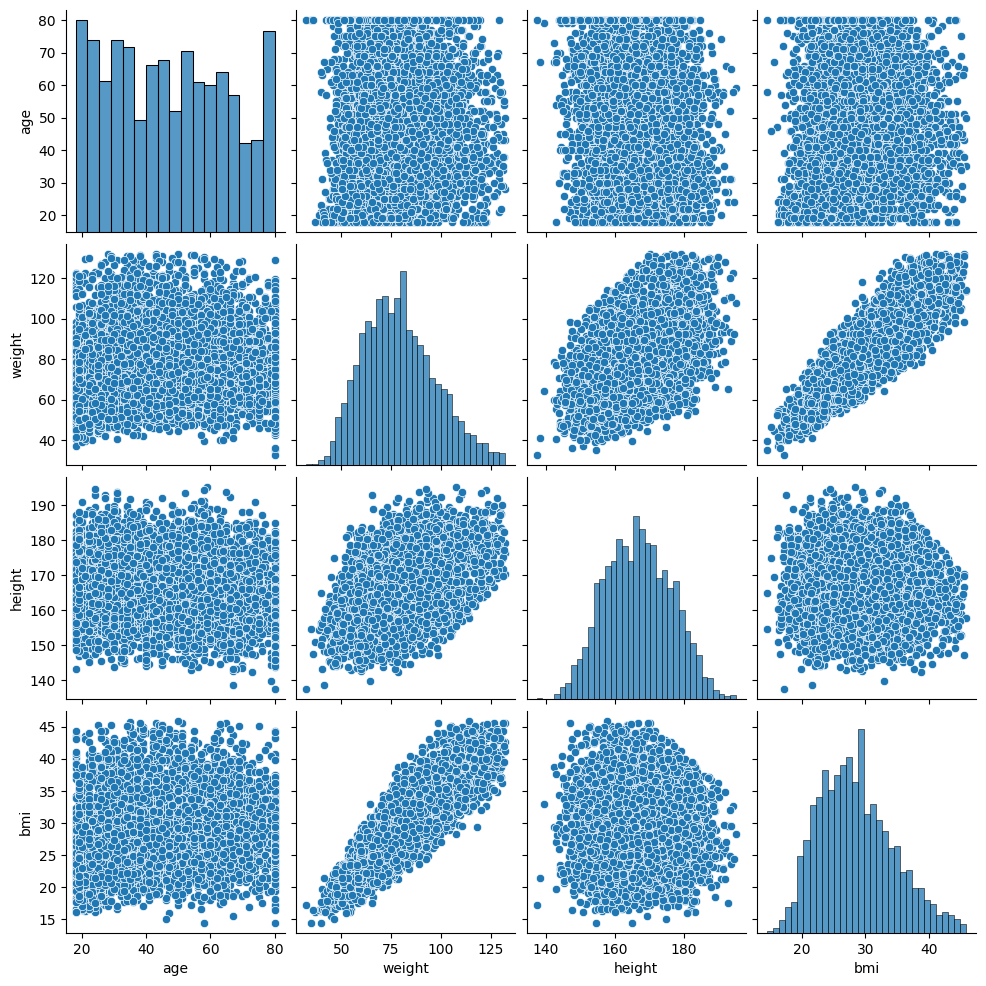

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(sous_data_clean)
plt.show()


In [ ]:
print(sous_data_clean.describe())

               age       weight       height          bmi
count  4852.000000  4852.000000  4852.000000  4852.000000
mean     47.007832    79.428899   166.780785    28.488330
std      18.462851    18.339338     9.655830     5.890934
min      18.000000    32.400000   137.400000    14.500000
25%      31.000000    65.700000   159.600000    24.000000
50%      46.000000    78.050000   166.600000    27.900000
75%      62.000000    91.225000   173.900000    32.200000
max      80.000000   132.300000   195.100000    45.900000


Distribution d'une variable numérique


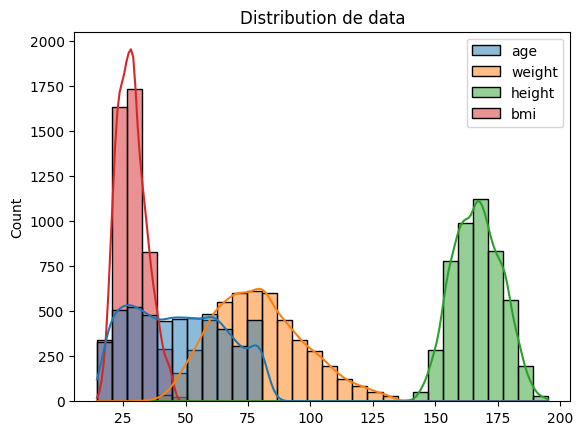

In [ ]:
#histogramme
sns.histplot(data=sous_data_clean,  bins=30, kde=True)
plt.title("Distribution de data")
plt.show()

Boxplot (pour détecter les valeurs aberrantes) :


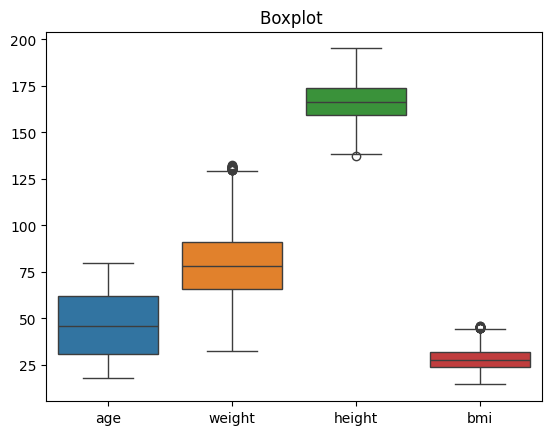

In [ ]:
sns.boxplot(data=sous_data_clean)
plt.title("Boxplot ")
plt.show()


Relation entre deux variables

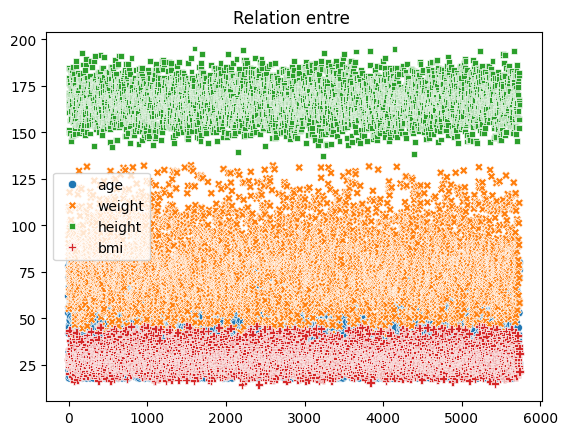

In [ ]:
sns.scatterplot(data=sous_data_clean)
plt.title("Relation entre ")
plt.show()


In [ ]:
correlation_matrix = sous_data_clean.corr(numeric_only=True)
print(correlation_matrix)


             age    weight    height       bmi
age     1.000000  0.033344 -0.113672  0.097390
weight  0.033344  1.000000  0.459330  0.861114
height -0.113672  0.459330  1.000000 -0.042944
bmi     0.097390  0.861114 -0.042944  1.000000


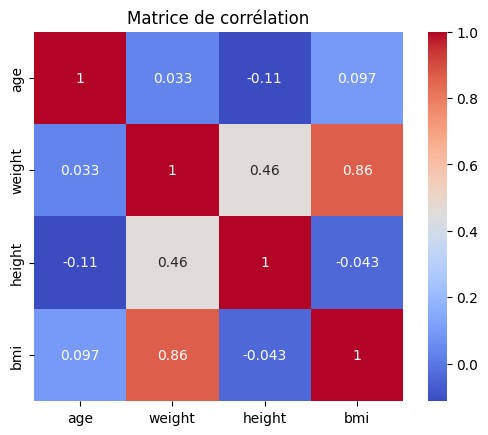

In [ ]:

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Matrice de corrélation")
plt.show()

In [ ]:
sous_data_clean.to_csv('/content/sous_data_clean.csv', index=False)


In [ ]:
import os
print(os.getcwd())


/content


Les requêtes SQL Via **SQLAlchemy**

In [ ]:
import os
from sqlalchemy import create_engine
import pandas as pd
from sqlalchemy import text


In [ ]:
sous_data_clean = pd.read_csv("sous_data_clean.csv")
load_dotenv()

user = os.getenv("PG_USER")
password = os.getenv("PG_PASSWORD")
host = os.getenv("PG_HOST")
port = os.getenv("PG_PORT")
dbname = os.getenv("PG_DBNAME")

engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}')

sous_data_clean.to_sql('health_data_cleaned', con=engine, index=False, if_exists='replace')


In [ ]:
with engine.connect() as conn:
    # Répartition par genre
    print(conn.execute(text("SELECT gender, COUNT(*) FROM health_data_cleaned GROUP BY gender")).fetchall())

    # Répartition par tabagisme
    print(conn.execute(text("SELECT smoking, COUNT(*) FROM health_data_cleaned GROUP BY smoking")).fetchall())

    # Moyenne de l'IMC par genre
    print(conn.execute(text("SELECT gender, AVG(bmi) FROM health_data_cleaned GROUP BY gender")).fetchall())

    # Répartition par éducation
    print(conn.execute(text("SELECT education, COUNT(*) FROM health_data_cleaned GROUP BY education")).fetchall())

    # Création des tranches d'âge
    conn.execute(text("""
        CREATE TEMP TABLE age_bins AS
        SELECT *,
        CASE
            WHEN age BETWEEN 18 AND 30 THEN '18-30'
            WHEN age BETWEEN 31 AND 50 THEN '31-50'
            ELSE '51+'
        END AS age_group
        FROM health_data_cleaned;
    """))

    # Moyenne IMC par tranche d’âge
    print(conn.execute(text("SELECT age_group, AVG(bmi) FROM age_bins GROUP BY age_group")).fetchall())

    # Moyenne d'âge selon le tabagisme
    print(conn.execute(text("SELECT smoking, AVG(age) FROM health_data_cleaned GROUP BY smoking")).fetchall())


